# ML2023Spring-hw1
## National Taiwan University Machine Learning(EE5184) 's homework1, taught by Hung,yi Lee in 2023
Competition page: https://www.kaggle.com/competitions/ml2023spring-hw1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split


# 复现结果
# See https://keras.io/examples/keras_recipes/reproducibility_recipes/
keras.utils.set_random_seed(42)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [3]:
#df_origin = pd.read_csv("/kaggle/input/ml2023spring-hw1/covid_train.csv").drop(columns = ['id'])
#df_test = pd.read_csv("/kaggle/input/ml2023spring-hw1/covid_test.csv").drop(columns = ['id'])

df_origin = pd.read_csv("/kaggle/input/hyleehw1/covid_train.csv").drop(columns = ['id'])
df_test = pd.read_csv("/kaggle/input/hyleehw1/covid_test.csv").drop(columns = ['id'])

**比较关键的是特征选择，这个方向还可以再探索一下**

In [4]:
list_column_features = [34, 36, 51, 52, 54, 70, 72, 69]

df_features = df_origin.iloc[:, list_column_features]
df_test = df_test.loc[:, df_features.columns]

df_features

,cli,wnohh_cmnty_cli,tested_positive,cli.1,wnohh_cmnty_cli.1,cli.2,wnohh_cmnty_cli.2,tested_positive.1
0,1.509413,18.583362,20.149280,1.451798,17.684337,1.308107,17.194312,18.876155
1,1.451798,17.684337,18.876155,1.308107,17.194312,1.406672,16.733442,18.490787
2,1.308107,17.194312,18.490787,1.406672,16.733442,1.381060,16.580258,16.329253
3,1.406672,16.733442,16.329253,1.381060,16.580258,1.307137,17.291188,16.522931
4,1.381060,16.580258,16.522931,1.307137,17.291188,1.206659,16.705053,15.578501
...,...,...,...,...,...,...,...,...
3004,1.145430,11.825744,6.549525,1.121511,11.772172,1.049163,11.764646,5.910541
3005,1.121511,11.772172,5.910541,1.049163,11.764646,1.210881,12.415059,6.487310
3006,1.049163,11.764646,6.487310,1.210881,12.415059,1.257293,12.270085,6.112827
3007,1.210881,12.415059,6.112827,1.257293,12.270085,1.647812,13.535265,6.151394


In [5]:
series_y = df_origin.iloc[:, -1]

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(df_features, series_y, test_size = 0.1)

In [7]:
model = Sequential()
    
model.add(Dense(16, activation='relu', input_shape=(df_features.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
    
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
lr_scheduler = LearningRateScheduler(lambda x: 0.01 * 0.5 ** (x // 100))
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(df_features, series_y, 
                    epochs=600, # 对于这个模型而言，600是个合适的选择，增大到1000会导致过拟合
                    batch_size=128, 
                    verbose=0, 
                    callbacks=[lr_scheduler, model_checkpoint],
                    validation_data=(X_val, Y_val))
    
model_best = load_model('best_model.h5')

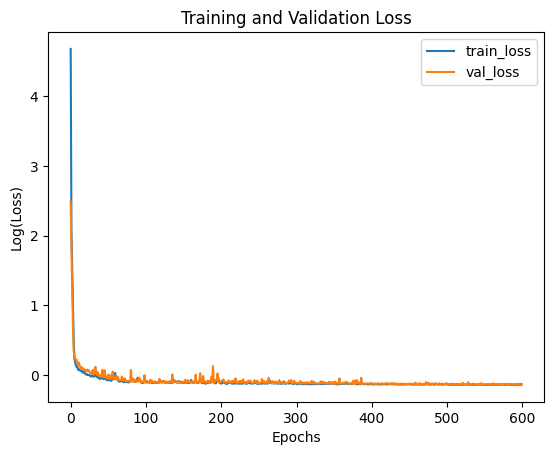

In [9]:
plt.plot(np.log(history.history['loss']), label='train_loss')
plt.plot(np.log(history.history['val_loss']), label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log(Loss)')
plt.legend()
plt.show()

In [10]:
pred = model_best.predict(df_test, verbose=0)
pd.DataFrame(pred).reset_index().to_csv("sub.csv", header=['id', 'tested_positive'], index=False)

Public Score ≈ 0.79631, Private Score ≈ 0.84217